In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
hvd = pd.read_csv('/Users/marcolaureano2/Documents/GitHub/Zillow/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [3]:
hvd.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [4]:
hvd

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [5]:
size_filter = hvd['SizeRank'] < 4

In [6]:
hvd_4 = hvd[size_filter]
hvd_4

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [7]:
hvd_melt = pd.melt(hvd_4, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'Metro', 'CountyName'])
hvd_melt

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,variable,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [8]:
hvd_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   variable    1092 non-null   object 
 9   value       1087 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 85.4+ KB


In [9]:
hvd_melt = hvd_melt.rename(columns = {'variable':'date'})

In [10]:
hvd_melt['date'] = pd.to_datetime(hvd_melt['date'])

In [11]:
hvd_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   date        1092 non-null   datetime64[ns]
 9   value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [12]:
hvd_melt = hvd_melt.set_index('date')

In [13]:
hvd_melt

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,value
date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [14]:
hvd_melt.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='date', length=1092, freq=None)

In [15]:
hvd_melt = hvd_melt.groupby('RegionName').resample('M').sum()

/var/folders/jx/cpydz30j3y523cvb2w4sjv7h0000gn/T/ipykernel_64946/3592202399.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hvd_melt = hvd_melt.groupby('RegionName').resample('M').sum()
/var/folders/jx/cpydz30j3y523cvb2w4sjv7h0000gn/T/ipykernel_64946/3592202399.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hvd_melt = hvd_melt.groupby('RegionName').resample('M').sum()
/var/folders/jx/cpydz30j3y523cvb2w4sjv7h0000gn/T/ipykernel_64946/3592202399.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either sp

In [16]:
hvd_melt

RegionID  SizeRank     value
RegionName date                                    
Chicago    2000-01-31     17426         3  166139.0
           2000-02-29     17426         3  166536.0
           2000-03-31     17426         3  167368.0
           2000-04-30     17426         3  168826.0
           2000-05-31     17426         3  170499.0
...                         ...       ...       ...
New York   2022-05-31      6181         0  768797.0
           2022-06-30      6181         0  773944.0
           2022-07-31      6181         0  777692.0
           2022-08-31      6181         0  779960.0
           2022-09-30      6181         0  781622.0

[1092 rows x 3 columns]

# visualizations

In [17]:
import matplotlib.ticker as mticks

In [18]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

In [19]:
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

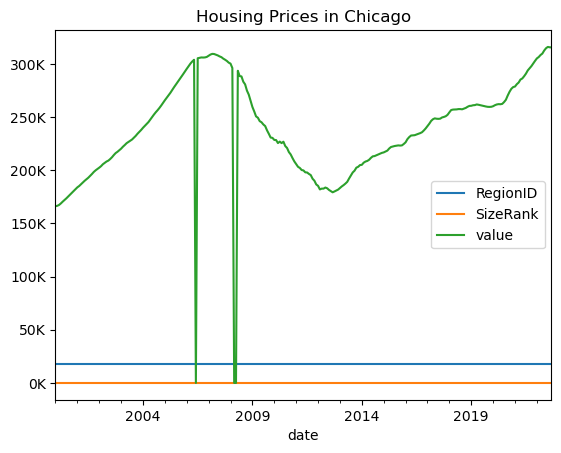

In [20]:
chicago_df = hvd_melt.loc['Chicago'].copy()
ax = chicago_df.plot()
ax.set_title('Housing Prices in Chicago')
ax.yaxis.set_major_formatter(fmt_thous);

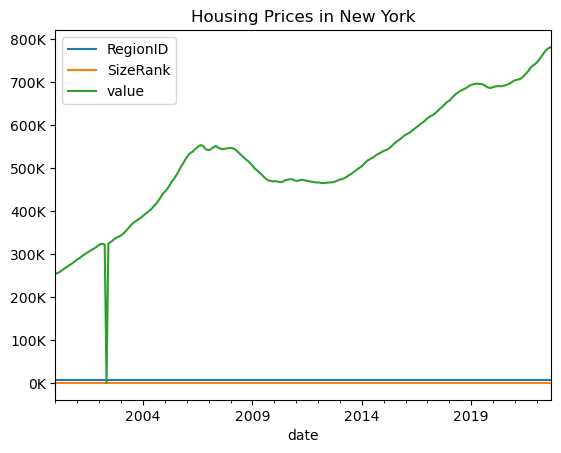

In [21]:
new_york_df = hvd_melt.loc['New York'].copy()
ax = new_york_df.plot()
ax.set_title('Housing Prices in New York')
ax.yaxis.set_major_formatter(fmt_thous);

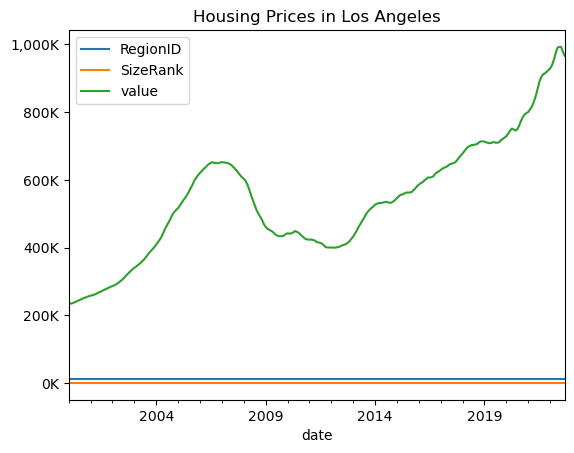

In [22]:
los_angeles_df = hvd_melt.loc['Los Angeles'].copy()
ax = los_angeles_df.plot()
ax.set_title('Housing Prices in Los Angeles')
ax.yaxis.set_major_formatter(fmt_thous);

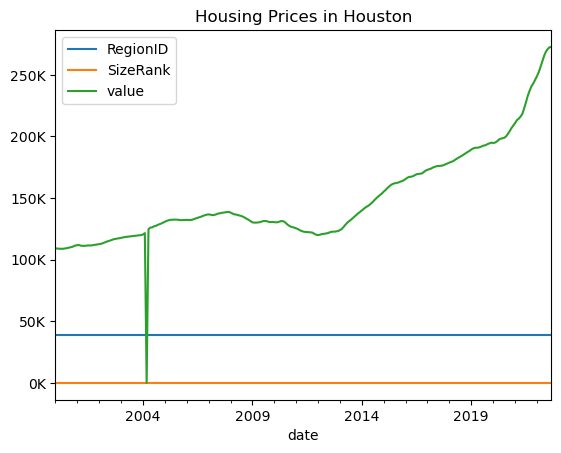

In [23]:
houston_df = hvd_melt.loc['Houston'].copy()
ax = houston_df.plot()
ax.set_title('Housing Prices in Houston')
ax.yaxis.set_major_formatter(fmt_thous);

In [24]:
unstacked = hvd_melt.unstack(level=0)
unstacked

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
date                                                                            
2000-01-31    17426   39051       12447     6181        3       2           1   
2000-02-29    17426   39051       12447     6181        3       2           1   
2000-03-31    17426   39051       12447     6181        3       2           1   
2000-04-30    17426   39051       12447     6181        3       2           1   
2000-05-31    17426   39051       12447     6181        3       2           1   
...             ...     ...         ...      ...      ...     ...         ...   
2022-05-31    17426   39051       12447     6181        3       2           1   
2022-06-30    17426   39051       12447     6181        3       2           1   
2022-07-31    17426   39051       12447     6181        3       2           1   
2022-08-31    17426   39051       12447     6181        3       2           1   
2022-09-30    17426   39051       12447     6181        3       2           1   

                        value                                  
RegionName New York   Chicago   Houston Los Angeles  New York  
date                                                           
2000-01-31        0  166139.0  109068.0    234181.0  253690.0  
2000-02-29        0  166536.0  109079.0    234401.0  255517.0  
2000-03-31        0  167368.0  108878.0    235513.0  257207.0  
2000-04-30        0  168826.0  108881.0    237589.0  260310.0  
2000-05-31        0  170499.0  108834.0    240113.0  263204.0  
...             ...       ...       ...         ...       ...  
2022-05-31        0  312487.0  265558.0    990391.0  768797.0  
2022-06-30        0  314663.0  268901.0    992337.0  773944.0  
2022-07-31        0  315910.0  271059.0    992630.0  777692.0  
2022-08-31        0  315587.0  272400.0    978196.0  779960.0  
2022-09-30        0  315429.0  272639.0    966595.0  781622.0  

[273 rows x 12 columns]

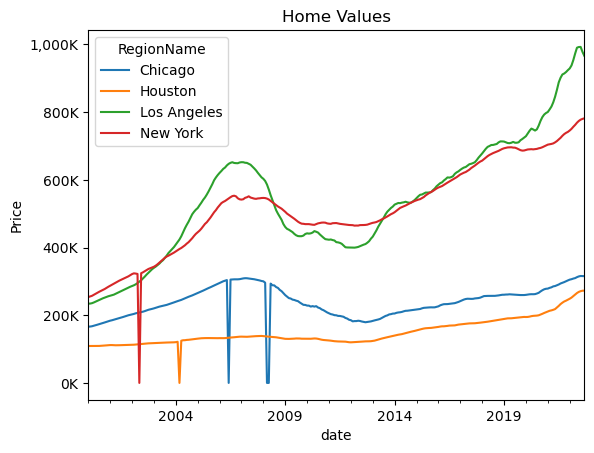

In [25]:
ax=unstacked['value'].plot(title='Home Values')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter(fmt_thous);

# 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [26]:
unstacked.loc[pd.IndexSlice['2008'],:]

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
date                                                                            
2008-01-31    17426   39051       12447     6181        3       2           1   
2008-02-29    17426   39051       12447     6181        3       2           1   
2008-03-31    17426   39051       12447     6181        3       2           1   
2008-04-30    17426   39051       12447     6181        3       2           1   
2008-05-31    17426   39051       12447     6181        3       2           1   
2008-06-30    17426   39051       12447     6181        3       2           1   
2008-07-31    17426   39051       12447     6181        3       2           1   
2008-08-31    17426   39051       12447     6181        3       2           1   
2008-09-30    17426   39051       12447     6181        3       2           1   
2008-10-31    17426   39051       12447     6181        3       2           1   
2008-11-30    17426   39051       12447     6181        3       2           1   
2008-12-31    17426   39051       12447     6181        3       2           1   

                        value                                  
RegionName New York   Chicago   Houston Los Angeles  New York  
date                                                           
2008-01-31        0  300207.0  138208.0    603029.0  546538.0  
2008-02-29        0  296063.0  137512.0    596635.0  546098.0  
2008-03-31        0       0.0  136795.0    586065.0  544562.0  
2008-04-30        0       0.0  136628.0    571226.0  541865.0  
2008-05-31        0  293467.0  136228.0    554589.0  537685.0  
2008-06-30        0  288495.0  135773.0    539622.0  533810.0  
2008-07-31        0  288174.0  135392.0    524220.0  529211.0  
2008-08-31        0  283199.0  134770.0    510520.0  525290.0  
2008-09-30        0  280695.0  133932.0    500124.0  521347.0  
2008-10-31        0  274849.0  133189.0    490979.0  518048.0  
2008-11-30        0  271059.0  132247.0    481905.0  514767.0  
2008-12-31        0  265306.0  131283.0    469294.0  510309.0

Highest: New York

Lowest: Chicago

# 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [27]:
diff = unstacked.diff()
diff

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
date                                                                            
2000-01-31      NaN     NaN         NaN      NaN      NaN     NaN         NaN   
2000-02-29      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2000-03-31      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2000-04-30      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2000-05-31      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
...             ...     ...         ...      ...      ...     ...         ...   
2022-05-31      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2022-06-30      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2022-07-31      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2022-08-31      0.0     0.0         0.0      0.0      0.0     0.0         0.0   
2022-09-30      0.0     0.0         0.0      0.0      0.0     0.0         0.0   

                      value                               
RegionName New York Chicago Houston Los Angeles New York  
date                                                      
2000-01-31      NaN     NaN     NaN         NaN      NaN  
2000-02-29      0.0   397.0    11.0       220.0   1827.0  
2000-03-31      0.0   832.0  -201.0      1112.0   1690.0  
2000-04-30      0.0  1458.0     3.0      2076.0   3103.0  
2000-05-31      0.0  1673.0   -47.0      2524.0   2894.0  
...             ...     ...     ...         ...      ...  
2022-05-31      0.0  2838.0  4457.0     17223.0   6476.0  
2022-06-30      0.0  2176.0  3343.0      1946.0   5147.0  
2022-07-31      0.0  1247.0  2158.0       293.0   3748.0  
2022-08-31      0.0  -323.0  1341.0    -14434.0   2268.0  
2022-09-30      0.0  -158.0   239.0    -11601.0   1662.0  

[273 rows x 12 columns]

In [28]:
diff.loc[pd.IndexSlice['11/01/2008':'12/01/2008'],:]

RegionID                              SizeRank                      \
RegionName  Chicago Houston Los Angeles New York  Chicago Houston Los Angeles   
date                                                                            
2008-11-30      0.0     0.0         0.0      0.0      0.0     0.0         0.0   

                      value                               
RegionName New York Chicago Houston Los Angeles New York  
date                                                      
2008-11-30      0.0 -3790.0  -942.0     -9074.0  -3281.0

Chicago - $3790

Houston - $942

Los Angeles - $9074

New York - $3281

# Gridsearch SARIMA Models

In [29]:
hvd_melt

RegionID  SizeRank     value
RegionName date                                    
Chicago    2000-01-31     17426         3  166139.0
           2000-02-29     17426         3  166536.0
           2000-03-31     17426         3  167368.0
           2000-04-30     17426         3  168826.0
           2000-05-31     17426         3  170499.0
...                         ...       ...       ...
New York   2022-05-31      6181         0  768797.0
           2022-06-30      6181         0  773944.0
           2022-07-31      6181         0  777692.0
           2022-08-31      6181         0  779960.0
           2022-09-30      6181         0  781622.0

[1092 rows x 3 columns]

In [31]:
hvd_melt.isna().sum()

RegionID    0
SizeRank    0
value       0
dtype: int64

In [32]:
hvd

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [34]:
hvd.isna().sum()

RegionID        0
SizeRank        0
RegionName      0
RegionType      0
StateName       0
             ... 
2022-05-31    230
2022-06-30    161
2022-07-31    116
2022-08-31     72
2022-09-30      5
Length: 281, dtype: int64